#### k-means算法聚类降维手写数字图像

**数据准备**
+ 读取MNIST测试数据
+ 选择所有数字{1,4,7}的图像作为聚类数据集
+ 显示前100个提取的数字图像

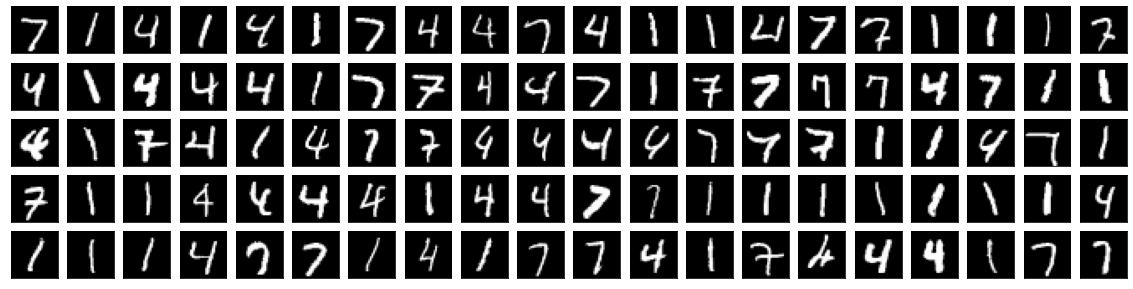

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("MNIST_test.csv")
X_test = data.iloc[:,1:785].to_numpy()
y_test = data.iloc[:,0].to_numpy()

id147 = np.where((y_test==1)|(y_test==4)|(y_test==7))
X = X_test[id147[0],:]

fix, axes = plt.subplots(5, 20, figsize=(20, 5),subplot_kw={'xticks': (), 'yticks': ()})
for x, ax in zip(X, axes.ravel()):
    image = x.reshape([28,28])
    ax.imshow(image, cmap="gray")

plt.show()

**聚类降维样本**

+ 使用PCA算法将聚类数据集降维到200维
+ 使用k-means算法将降维之后的数据集聚类为3个簇
+ 分别显示3个簇的前20附图像

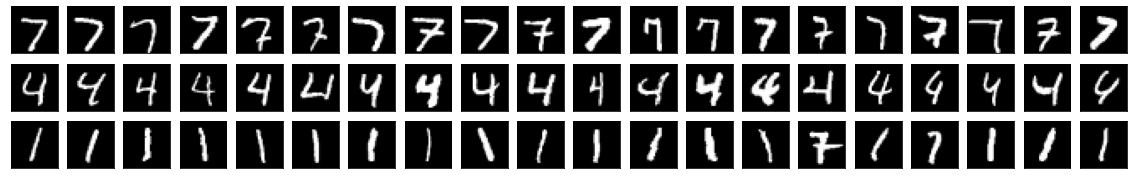

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=200).fit(X_test)
X_pca = pca.transform(X)

Labels = KMeans(n_clusters=3,random_state=0).fit_predict(X_pca)

fix, axes = plt.subplots(3, 20, figsize=(20, 3),subplot_kw={'xticks': (), 'yticks': ()})
for i in range(3):
    id = np.where(Labels==i)[0]
    for j, ax in zip(range(20),axes[i,:].ravel()):
        image = X[id[j],:].reshape([28,28])
        ax.imshow(image,cmap='gray')

plt.show()